In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona_data_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_data_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Delete useless columns from the dataset 

In [3]:
corona_df = corona_data_csv.drop(['Lat', 'Long'], axis = 1)

In [4]:
corona_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Aggregrate rows by Country 

In [6]:
corona_df_aggregated = corona_df.groupby("Country/Region").sum()

In [7]:
corona_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_df_aggregated.shape

(187, 100)

## Visualizing data related to a country 

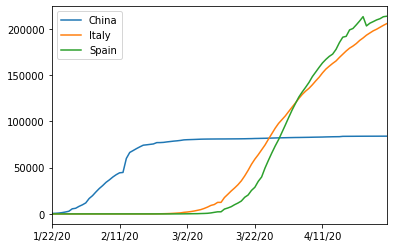

In [10]:
corona_df_aggregated.loc["China"].plot()
corona_df_aggregated.loc["Italy"].plot()
corona_df_aggregated.loc["Spain"].plot()
plt.legend()

## Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

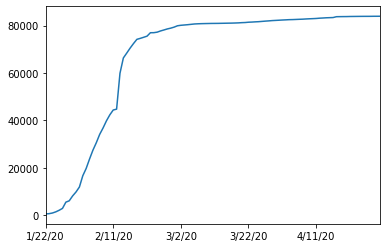

In [11]:
corona_df_aggregated.loc["China"].plot()

### Calculating the first derivative of the curve

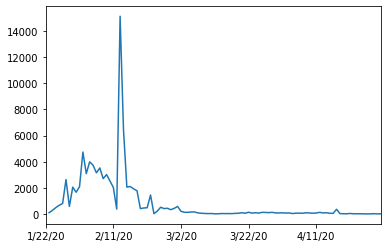

In [13]:
corona_df_aggregated.loc["China"].diff().plot()

### Calculating the max infection rate 

In [14]:
corona_df_aggregated.loc["China"].diff().max()

15136.0

In [15]:
countries = list(corona_df_aggregated.index)
max_infection_rates = []
for c in countries: 
    max_infection_rates.append(corona_df_aggregated.loc[c].diff().max()) 

corona_df_aggregated['Max Infection Rate'] = max_infection_rates

In [16]:
corona_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with only the needed columns  

In [17]:
corona_data = pd.DataFrame(corona_df_aggregated['Max Infection Rate'])
corona_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


# Correlation with Happiness Report

### Importing the dataset 

In [18]:
happiness_data = pd.read_csv("worldwide_happiness_report.csv")
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
happiness_data.shape

(156, 9)

### Dropping the useless columns  

In [20]:
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_data.drop(columns_to_dropped, axis = 1, inplace = True)

### Setting indices as Country  

In [21]:
happiness_data.set_index(["Country or region"], inplace = True)

In [22]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the two datasets on the index  

In [23]:
corona_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [24]:
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
data = happiness_data.join(corona_data, how = "inner").copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection Rate
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


### Correlation Matrix 

In [27]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection Rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,0.250118
Social support,0.759468,1.000000,0.765286,0.456246,0.191958
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,0.289263
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.078196
Max Infection Rate,0.250118,0.191958,0.289263,0.078196,1.000000


## Visualizing the results  
The analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [28]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection Rate
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


### GDP vs Max Infection Rate 

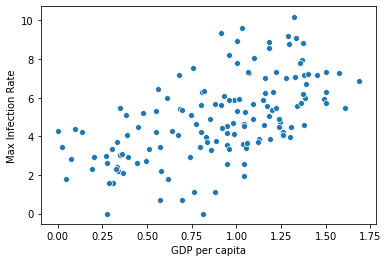

In [34]:
x = data['GDP per capita']
y = np.log(data['Max Infection Rate'])   #applying log scaling
sns.scatterplot(x, y)

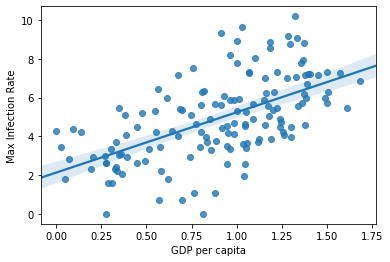

In [35]:
sns.regplot(x, y)

### Social Support vs Max Infection Rate 

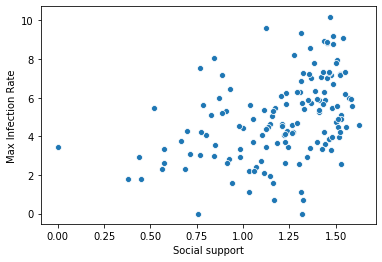

In [36]:
x = data['Social support']
y = np.log(data['Max Infection Rate'])  
sns.scatterplot(x, y)

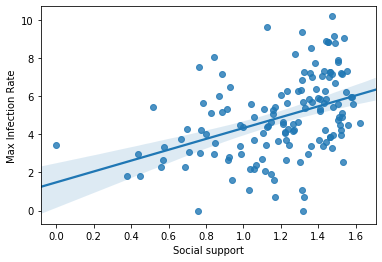

In [37]:
sns.regplot(x, y)

### Healthy Life Expectancy vs Max Infection Rate 

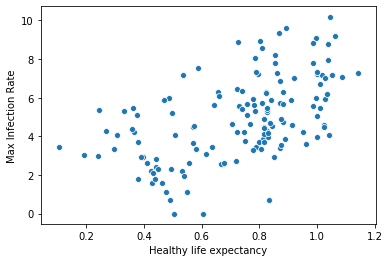

In [38]:
x = data['Healthy life expectancy']
y = np.log(data['Max Infection Rate'])  
sns.scatterplot(x, y)

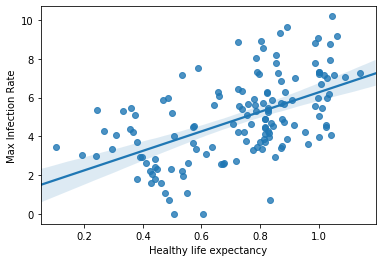

In [39]:
sns.regplot(x, y)

### Freedom to make life choices vs Max Infection Rate  

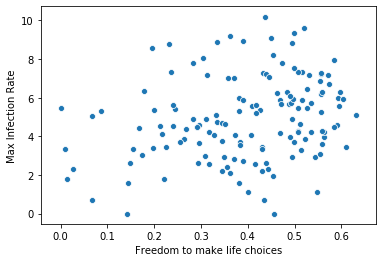

In [40]:
x = data['Freedom to make life choices']
y = np.log(data['Max Infection Rate'])  
sns.scatterplot(x, y)

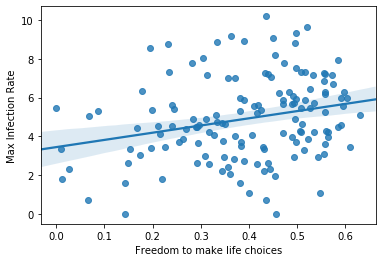

In [41]:
sns.regplot(x, y)

## Thoughts 

A positive correlation is observed between the coronavirus data and the world happiness dataset. We can observe that the countries with higher GDP per capita have a higher infection rate than the ones with low GDP per capita. This explains that the developed countries tend to have more testing centres and kits leading to a higher number of confirmed cases.  